<a href="https://colab.research.google.com/github/JulianDR26/Se-ales-y-Sistemas-2024-1S/blob/main/PARCIAL_1_SE%C3%91ALES_Y_SISTEMAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXAMEN 1: SEÑALES Y SISTEMAS SOLUCION

In [6]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

 **Explicación del primer punto a).**

**No lo simulé profe como tal la solución de la señal se encuentra en el pdf adjunto con el proceso a mano de las operaciones y del porque aplique ciertas propiedades para hallar la distancia entre dos señales**

# B) DISCRETIZANDO SEÑAL CONTINUA Y RECTIFICAR SI LA FRECUENCIA ES O NO APROPIADA, SI NO SE IMPLEMENTA UN CONVERSOR ADECUADO A LA SEÑAL

[0.00000000e+00 1.81818182e-06 3.63636364e-06 ... 6.28314545e-01
 6.28316364e-01 6.28318182e-01]
[-7.         -6.9231976  -6.80711298 ...  7.49840536  6.83580793
  6.17008243]


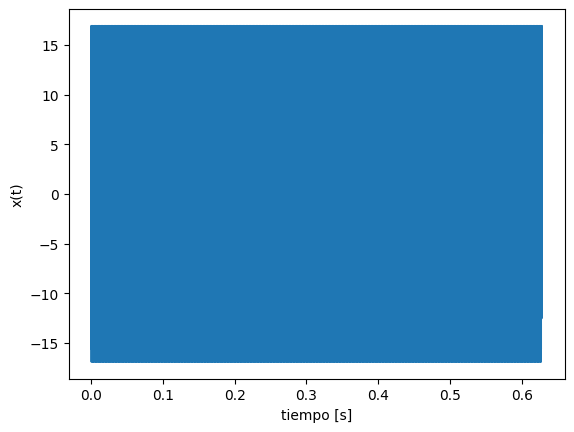

In [15]:
# Lo que voy a escribir aquí es una explicación sobre el proceso de discretización realizado
# en el pdf que se adjuntará tambien en el github.
# Lo primero que hice fue revisar si la frecuencia de muestreo cumplia con el teorema de Nyquist
# Es decir, revisamos las frecuencias y sacamos el maximo.
# Pero antes de eso defino mi vector tiempo

#Vector de tiempo
T1=(2*np.pi)/w1
T2=(2*np.pi)/w2
T3=(2*np.pi)/w3
T=(np.pi)/10 # Periodo total de la funcion cuasiperiodica
ti=0         # Tiempo inicial
tf=2*T        # Tiempo final que sea 2 veces el periodo
tv=np.arange(ti, tf, T3/100)
print(tv)


# DEFINICIÓN DE LA FUNCIÓN A GRAFICAR
A=3 #Amplitud 1
w1=1000*np.pi
F1=(1000*np.pi)/(2*np.pi)

B=5 #Amplitud2
w2=2000*np.pi
F2=(2000*np.pi)/(2*np.pi)

C=10  #Amplitud3
w3=11000*np.pi #frecuencia angular de la funcion 3
F3=(11000*np.pi)/(2*np.pi)

# En este caso la frecuencia mayor es F3 y por ende se pasa a comprobar el teorema de nyquist
Fmax=2*max(F1,F2,F3)
if Fmax >= 2.2*max(F1,F2,F3):
  print('Cumple con Nyquist')
else:
  print('No cumple con Nyquist')
#Como en este caso no cumple con Nyquist de todas formas procedo a hacer la discretización para
#Encontrar el valor de omega para saber si es una señal copia o aliasing o no

y=(A*np.cos(w1*tv))+(B*np.sin(w2*tv))-(C*np.cos(w3*tv))
print(y)



# GRAFICANDO LA FUNCIÓN
plt.plot(tv,y)
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.show()

#===========================
#NO ALCANCÉ A TERMINAR EL PROCESO DE CUANTIZACIÓN Y DE DISCRETIZACIÓN EN PYTHON


# C) SALIDA DEL SLIT CON RESPUESTA AL ESCALÓN DISCRETO

<ipython-input-21-a01a55cc0faf>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


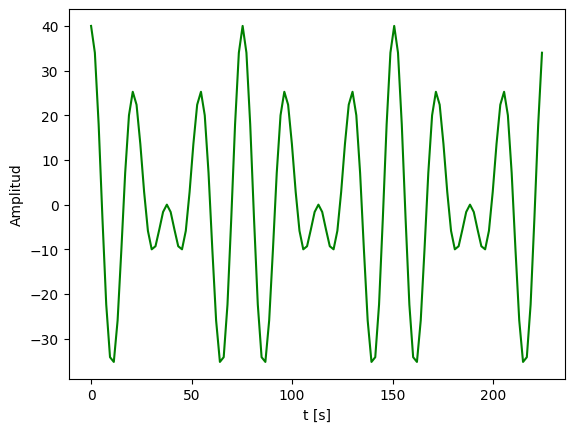

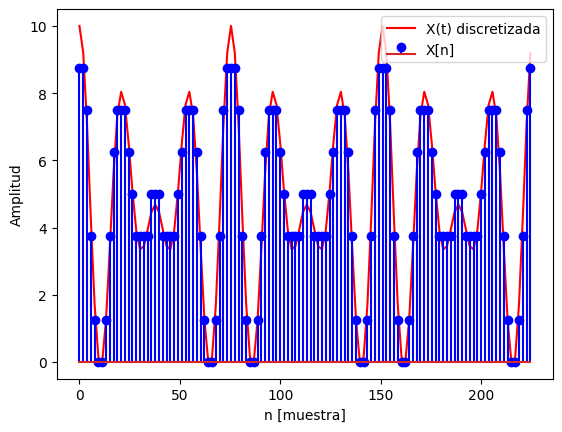

In [21]:
#función cero y pendiente
def my_ceropend(x,xhmax=10,xhmin=0):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())
  b = xhmin - m*x.min()
  xh = m*x+b
  return xh

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

T1 = 6*np.pi #perido señal 1
T2 = 8*np.pi #perido señal 2
F1 = 1/T1
F2 = 1/T2
T = 24*np.pi #perido cuasiperiódica
Fs = 10*max(F1,F2) #frecuencia muestreo
t = np.arange(0,3*T,1/Fs) #vector de tiempo, se muestran 3 periodos
x = 20*(np.cos(t/3)+np.cos(t/4))
xhmax = 10
xhmin = 0
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 0 a 10
#asegurar vector columna

#cuantizar
nbits = 3 #número bits
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

#gráficas de señales
plt.plot(t,x,'green',label='X(t)')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.plot(t,xh,'r',label='X(t) discretizada')
plt.stem(t,xq,'blue',label='X[n]')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

In [22]:
he = np.array([2,4,1,5,0,10]) #respuesta al escalón del slit
h = np.diff(he)#respuesta al impulso del slit
print(h)


[ 2 -3  4 -5 10]


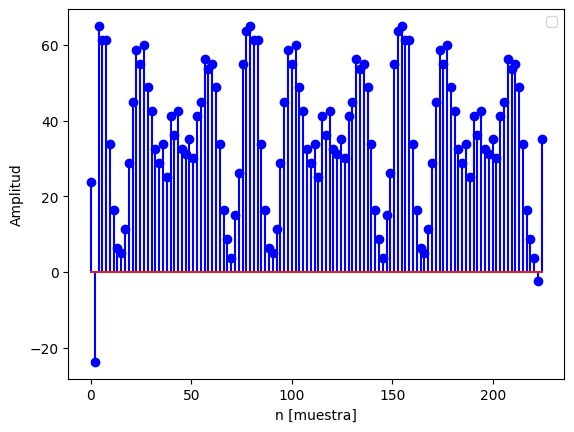

In [24]:
y = np.convolve(xq,h,mode='same')#respuesta del slit -> se asegura tamaños iguales con mode=same
#graficar señal
plt.stem(t,y,'b',label='')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.show()

